In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the CSV file
data= pd.read_csv('dataset.csv')

In [ ]:
data

Unnamed: 0                              Title  Year  Rating  \
0               0                     It Chapter Two  2019     6.5   
1               1                     It Chapter Two  2019     6.5   
2               2                     It Chapter Two  2019     6.5   
3               3                     It Chapter Two  2019     6.5   
4               4                     It Chapter Two  2019     6.5   
...           ...                                ...   ...     ...   
81058       81058  Everything Everywhere All at Once  2022     7.8   
81059       81059  Everything Everywhere All at Once  2022     7.8   
81060       81060  Everything Everywhere All at Once  2022     7.8   
81061       81061  Everything Everywhere All at Once  2022     7.8   
81062       81062  Everything Everywhere All at Once  2022     7.8   

                                           Genres  \
0                          Drama, Fantasy, Horror   
1                          Drama, Fantasy, Horror   
2                          Drama, Fantasy, Horror   
3                          Drama, Fantasy, Horror   
4                          Drama, Fantasy, Horror   
...                                           ...   
81058  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81059  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81060  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81061  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81062  Action, Adventure, Comedy, Fantasy, Sci-Fi   

                                            User Reviews Name RT_review  
0      I personally didn't enjoy IT 2017 so I didn't ...  NaN       NaN  
1      I really, realllly wanted to like this film. A...  NaN       NaN  
2      I was originally hesitant to see director Andy...  NaN       NaN  
3      ...it is a disgrace because it is a gross betr...  NaN       NaN  
4      Firstly, those people giving this a 9 and 10.....  NaN       NaN  
...                                                  ...  ...       ...  
81058  I don't mind weird films. Truly, I don't. But ...  NaN       NaN  
81059  Most of us who are mindful of the film can agr...  NaN       NaN  
81060  It was everything everywhere all at once. Some...  NaN       NaN  
81061  There's a point here where we are swept up in ...  NaN       NaN  
81062  Rarely does a movie hit me hard and I go along...  NaN       NaN  

[81063 rows x 8 columns]

In [ ]:
#Drop Columns which is irrelevant
data.drop(columns='Unnamed: 0', inplace=True)
data.drop(columns='Name', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81063 entries, 0 to 81062
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         81063 non-null  object 
 1   Year          81063 non-null  int64  
 2   Rating        81063 non-null  float64
 3   Genres        81063 non-null  object 
 4   User Reviews  81063 non-null  object 
 5   RT_review     74046 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.7+ MB


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis using NLTK Vader SentimentIntensityAnalyzer on IMDB data
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'

# Calculate sentiment scores for each text
data['sentiment_score_imdb'] = data['User Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Get sentiment labels
data['sentiment_imdb'] = data['sentiment_score_imdb'].apply(get_sentiment_label)


In [ ]:
data

Title  Year  Rating  \
0                         It Chapter Two  2019     6.5   
1                         It Chapter Two  2019     6.5   
2                         It Chapter Two  2019     6.5   
3                         It Chapter Two  2019     6.5   
4                         It Chapter Two  2019     6.5   
...                                  ...   ...     ...   
81058  Everything Everywhere All at Once  2022     7.8   
81059  Everything Everywhere All at Once  2022     7.8   
81060  Everything Everywhere All at Once  2022     7.8   
81061  Everything Everywhere All at Once  2022     7.8   
81062  Everything Everywhere All at Once  2022     7.8   

                                           Genres  \
0                          Drama, Fantasy, Horror   
1                          Drama, Fantasy, Horror   
2                          Drama, Fantasy, Horror   
3                          Drama, Fantasy, Horror   
4                          Drama, Fantasy, Horror   
...                                           ...   
81058  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81059  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81060  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81061  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81062  Action, Adventure, Comedy, Fantasy, Sci-Fi   

                                            User Reviews RT_review  \
0      I personally didn't enjoy IT 2017 so I didn't ...       NaN   
1      I really, realllly wanted to like this film. A...       NaN   
2      I was originally hesitant to see director Andy...       NaN   
3      ...it is a disgrace because it is a gross betr...       NaN   
4      Firstly, those people giving this a 9 and 10.....       NaN   
...                                                  ...       ...   
81058  I don't mind weird films. Truly, I don't. But ...       NaN   
81059  Most of us who are mindful of the film can agr...       NaN   
81060  It was everything everywhere all at once. Some...       NaN   
81061  There's a point here where we are swept up in ...       NaN   
81062  Rarely does a movie hit me hard and I go along...       NaN   

       sentiment_score_imdb sentiment_imdb  
0                   -0.9853       Negative  
1                   -0.5616       Negative  
2                    0.9834       Positive  
3                   -0.9719       Negative  
4                   -0.9543       Negative  
...                     ...            ...  
81058               -0.0987       Negative  
81059                0.9984       Positive  
81060                0.9982       Positive  
81061               -0.6705       Negative  
81062                0.9983       Positive  

[81063 rows x 8 columns]

In [ ]:
# Sentiment Analysis using NLTK Vader SentimentIntensityAnalyzer on RT data
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'

# Convert empty strings in 'RT_review' column to a chosen value
data['RT_review'].fillna('', inplace=True)

# Calculate sentiment scores for each text
data['sentiment_score_rt'] = data['RT_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Get sentiment labels
data['sentiment_rt'] = data['sentiment_score_rt'].apply(get_sentiment_label)


In [ ]:
data

Title  Year  Rating  \
0                         It Chapter Two  2019     6.5   
1                         It Chapter Two  2019     6.5   
2                         It Chapter Two  2019     6.5   
3                         It Chapter Two  2019     6.5   
4                         It Chapter Two  2019     6.5   
...                                  ...   ...     ...   
81058  Everything Everywhere All at Once  2022     7.8   
81059  Everything Everywhere All at Once  2022     7.8   
81060  Everything Everywhere All at Once  2022     7.8   
81061  Everything Everywhere All at Once  2022     7.8   
81062  Everything Everywhere All at Once  2022     7.8   

                                           Genres  \
0                          Drama, Fantasy, Horror   
1                          Drama, Fantasy, Horror   
2                          Drama, Fantasy, Horror   
3                          Drama, Fantasy, Horror   
4                          Drama, Fantasy, Horror   
...                                           ...   
81058  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81059  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81060  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81061  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81062  Action, Adventure, Comedy, Fantasy, Sci-Fi   

                                            User Reviews RT_review  \
0      I personally didn't enjoy IT 2017 so I didn't ...             
1      I really, realllly wanted to like this film. A...             
2      I was originally hesitant to see director Andy...             
3      ...it is a disgrace because it is a gross betr...             
4      Firstly, those people giving this a 9 and 10.....             
...                                                  ...       ...   
81058  I don't mind weird films. Truly, I don't. But ...             
81059  Most of us who are mindful of the film can agr...             
81060  It was everything everywhere all at once. Some...             
81061  There's a point here where we are swept up in ...             
81062  Rarely does a movie hit me hard and I go along...             

       sentiment_score_imdb sentiment_imdb  sentiment_score_rt sentiment_rt  
0                   -0.9853       Negative                 0.0         None  
1                   -0.5616       Negative                 0.0         None  
2                    0.9834       Positive                 0.0         None  
3                   -0.9719       Negative                 0.0         None  
4                   -0.9543       Negative                 0.0         None  
...                     ...            ...                 ...          ...  
81058               -0.0987       Negative                 0.0         None  
81059                0.9984       Positive                 0.0         None  
81060                0.9982       Positive                 0.0         None  
81061               -0.6705       Negative                 0.0         None  
81062                0.9983       Positive                 0.0         None  

[81063 rows x 10 columns]

In [ ]:
# replace empty strings in the 'RT_review' column with the value 'No_review from rotten tomatoes'
chosen_value = 'No_review from rotten tomatoes'
data['RT_review'].replace('', chosen_value, inplace=True)

In [ ]:
data

Title  Year  Rating  \
0                         It Chapter Two  2019     6.5   
1                         It Chapter Two  2019     6.5   
2                         It Chapter Two  2019     6.5   
3                         It Chapter Two  2019     6.5   
4                         It Chapter Two  2019     6.5   
...                                  ...   ...     ...   
81058  Everything Everywhere All at Once  2022     7.8   
81059  Everything Everywhere All at Once  2022     7.8   
81060  Everything Everywhere All at Once  2022     7.8   
81061  Everything Everywhere All at Once  2022     7.8   
81062  Everything Everywhere All at Once  2022     7.8   

                                           Genres  \
0                          Drama, Fantasy, Horror   
1                          Drama, Fantasy, Horror   
2                          Drama, Fantasy, Horror   
3                          Drama, Fantasy, Horror   
4                          Drama, Fantasy, Horror   
...                                           ...   
81058  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81059  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81060  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81061  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81062  Action, Adventure, Comedy, Fantasy, Sci-Fi   

                                            User Reviews  \
0      I personally didn't enjoy IT 2017 so I didn't ...   
1      I really, realllly wanted to like this film. A...   
2      I was originally hesitant to see director Andy...   
3      ...it is a disgrace because it is a gross betr...   
4      Firstly, those people giving this a 9 and 10.....   
...                                                  ...   
81058  I don't mind weird films. Truly, I don't. But ...   
81059  Most of us who are mindful of the film can agr...   
81060  It was everything everywhere all at once. Some...   
81061  There's a point here where we are swept up in ...   
81062  Rarely does a movie hit me hard and I go along...   

                            RT_review  sentiment_score_imdb sentiment_imdb  \
0      No_review from rotten tomatoes               -0.9853       Negative   
1      No_review from rotten tomatoes               -0.5616       Negative   
2      No_review from rotten tomatoes                0.9834       Positive   
3      No_review from rotten tomatoes               -0.9719       Negative   
4      No_review from rotten tomatoes               -0.9543       Negative   
...                               ...                   ...            ...   
81058  No_review from rotten tomatoes               -0.0987       Negative   
81059  No_review from rotten tomatoes                0.9984       Positive   
81060  No_review from rotten tomatoes                0.9982       Positive   
81061  No_review from rotten tomatoes               -0.6705       Negative   
81062  No_review from rotten tomatoes                0.9983       Positive   

       sentiment_score_rt sentiment_rt  
0                     0.0         None  
1                     0.0         None  
2                     0.0         None  
3                     0.0         None  
4                     0.0         None  
...                   ...          ...  
81058                 0.0         None  
81059                 0.0         None  
81060                 0.0         None  
81061                 0.0         None  
81062                 0.0         None  

[81063 rows x 10 columns]

In [ ]:
#Drop Columns which is irrelevant
data.drop(columns='sentiment_score_rt', inplace=True)
data.drop(columns='sentiment_score_imdb', inplace=True)

In [ ]:
data

Title  Year  Rating  \
0                         It Chapter Two  2019     6.5   
1                         It Chapter Two  2019     6.5   
2                         It Chapter Two  2019     6.5   
3                         It Chapter Two  2019     6.5   
4                         It Chapter Two  2019     6.5   
...                                  ...   ...     ...   
81058  Everything Everywhere All at Once  2022     7.8   
81059  Everything Everywhere All at Once  2022     7.8   
81060  Everything Everywhere All at Once  2022     7.8   
81061  Everything Everywhere All at Once  2022     7.8   
81062  Everything Everywhere All at Once  2022     7.8   

                                           Genres  \
0                          Drama, Fantasy, Horror   
1                          Drama, Fantasy, Horror   
2                          Drama, Fantasy, Horror   
3                          Drama, Fantasy, Horror   
4                          Drama, Fantasy, Horror   
...                                           ...   
81058  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81059  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81060  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81061  Action, Adventure, Comedy, Fantasy, Sci-Fi   
81062  Action, Adventure, Comedy, Fantasy, Sci-Fi   

                                            User Reviews  \
0      I personally didn't enjoy IT 2017 so I didn't ...   
1      I really, realllly wanted to like this film. A...   
2      I was originally hesitant to see director Andy...   
3      ...it is a disgrace because it is a gross betr...   
4      Firstly, those people giving this a 9 and 10.....   
...                                                  ...   
81058  I don't mind weird films. Truly, I don't. But ...   
81059  Most of us who are mindful of the film can agr...   
81060  It was everything everywhere all at once. Some...   
81061  There's a point here where we are swept up in ...   
81062  Rarely does a movie hit me hard and I go along...   

                            RT_review sentiment_imdb sentiment_rt  
0      No_review from rotten tomatoes       Negative         None  
1      No_review from rotten tomatoes       Negative         None  
2      No_review from rotten tomatoes       Positive         None  
3      No_review from rotten tomatoes       Negative         None  
4      No_review from rotten tomatoes       Negative         None  
...                               ...            ...          ...  
81058  No_review from rotten tomatoes       Negative         None  
81059  No_review from rotten tomatoes       Positive         None  
81060  No_review from rotten tomatoes       Positive         None  
81061  No_review from rotten tomatoes       Negative         None  
81062  No_review from rotten tomatoes       Positive         None  

[81063 rows x 8 columns]

In [ ]:
#count the number of missing (NaN) values
data.isna().sum()

Title                 0
Year                  0
Rating                0
Genres                0
User Reviews          0
RT_review             0
sentiment_imdb      406
sentiment_rt      16150
dtype: int64

In [ ]:
data_cleaned = data.dropna()  # Create a new DataFrame without rows containing missing values
data_cleaned.isna().sum()

Title             0
Year              0
Rating            0
Genres            0
User Reviews      0
RT_review         0
sentiment_imdb    0
sentiment_rt      0
dtype: int64

<ipython-input-17-7b8e7191afd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_rt'] = data_cleaned['sentiment_rt'].astype('category')


<Axes: xlabel='sentiment_rt', ylabel='count'>

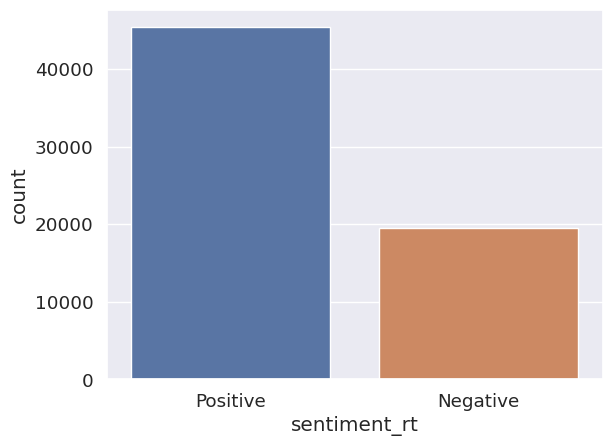

In [ ]:
import seaborn as sns
# Convert the 'sentiment_rt' column to a categorical data type
data_cleaned['sentiment_rt'] = data_cleaned['sentiment_rt'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)

sns.countplot(data=data, x='sentiment_rt')

<ipython-input-18-54993721970f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_imdb'] = data_cleaned['sentiment_imdb'].astype('category')


<Axes: xlabel='sentiment_imdb', ylabel='count'>

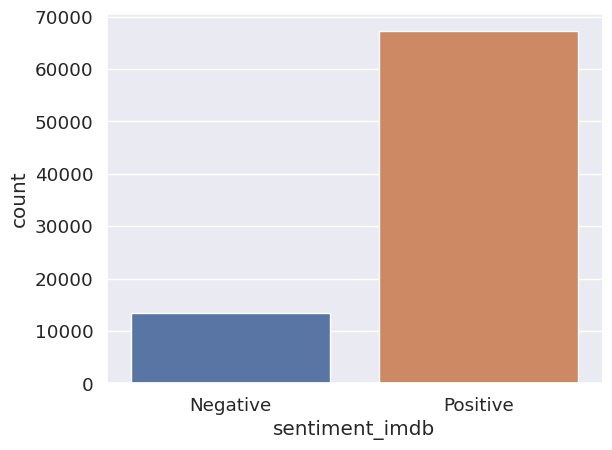

In [ ]:
# Convert the 'sentiment_imdb' column to a categorical data type
data_cleaned['sentiment_imdb'] = data_cleaned['sentiment_imdb'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)

sns.countplot(data=data, x='sentiment_imdb')

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#load the set of English stopwords and the string module to get a list of punctuation characters.
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on imdb review column
data_cleaned['User Reviews']=data_cleaned['User Reviews'].apply(denoise_text)

<ipython-input-21-9f0b872a769f>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-21-9f0b872a769f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['User Reviews']=data_cleaned['User Reviews'].apply(denoise_text)


In [ ]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on rt review column
data_cleaned['RT_review']=data_cleaned['RT_review'].apply(denoise_text)

<ipython-input-22-3442c2bdd85b>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-22-3442c2bdd85b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['RT_review']=data_cleaned['RT_review'].apply(denoise_text)


In [ ]:
#Replaces the string labels 'Positive' with the integer 1, and 'Negative' with the integer. For IMDB data
data_cleaned.sentiment_imdb.replace("Positive" , 1 , inplace = True)
data_cleaned.sentiment_imdb.replace("Negative" , 0 , inplace = True)
data_cleaned.head()

<ipython-input-23-125771998ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_imdb.replace("Positive" , 1 , inplace = True)
<ipython-input-23-125771998ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_imdb.replace("Negative" , 0 , inplace = True)


Title  Year  Rating                  Genres  \
10  The Departed  2006     8.5  Crime, Drama, Thriller   
12  The Departed  2006     8.5  Crime, Drama, Thriller   
14  The Departed  2006     8.5  Crime, Drama, Thriller   
15  The Departed  2006     8.5  Crime, Drama, Thriller   
16  The Departed  2006     8.5  Crime, Drama, Thriller   

                                         User Reviews  \
10  departed finally gained martin scorsese best d...   
12  departed finally gained martin scorsese best d...   
14  departed finally gained martin scorsese best d...   
15  departed finally gained martin scorsese best d...   
16  departed finally gained martin scorsese best d...   

                                            RT_review sentiment_imdb  \
10  martin adaptation hong kong thriller infernal ...              1   
12                                     like like good              1   
14              departed among best even best version              1   
15  nicholson form paternal lends inimitable relis...              1   
16  one best crime dramas ever departed riveting f...              1   

   sentiment_rt  
10     Positive  
12     Positive  
14     Negative  
15     Positive  
16     Positive

In [ ]:
#Replaces the string labels 'Positive' with the integer 1, and 'Negative' with the integer. For RT data
data_cleaned.sentiment_rt.replace("Positive" , 1 , inplace = True)
data_cleaned.sentiment_rt.replace("Negative" , 0 , inplace = True)
data_cleaned.head()

<ipython-input-24-0819e7df95ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_rt.replace("Positive" , 1 , inplace = True)
<ipython-input-24-0819e7df95ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_rt.replace("Negative" , 0 , inplace = True)


Title  Year  Rating                  Genres  \
10  The Departed  2006     8.5  Crime, Drama, Thriller   
12  The Departed  2006     8.5  Crime, Drama, Thriller   
14  The Departed  2006     8.5  Crime, Drama, Thriller   
15  The Departed  2006     8.5  Crime, Drama, Thriller   
16  The Departed  2006     8.5  Crime, Drama, Thriller   

                                         User Reviews  \
10  departed finally gained martin scorsese best d...   
12  departed finally gained martin scorsese best d...   
14  departed finally gained martin scorsese best d...   
15  departed finally gained martin scorsese best d...   
16  departed finally gained martin scorsese best d...   

                                            RT_review sentiment_imdb  \
10  martin adaptation hong kong thriller infernal ...              1   
12                                     like like good              1   
14              departed among best even best version              1   
15  nicholson form paternal lends inimitable relis...              1   
16  one best crime dramas ever departed riveting f...              1   

   sentiment_rt  
10            1  
12            1  
14            0  
15            1  
16            1

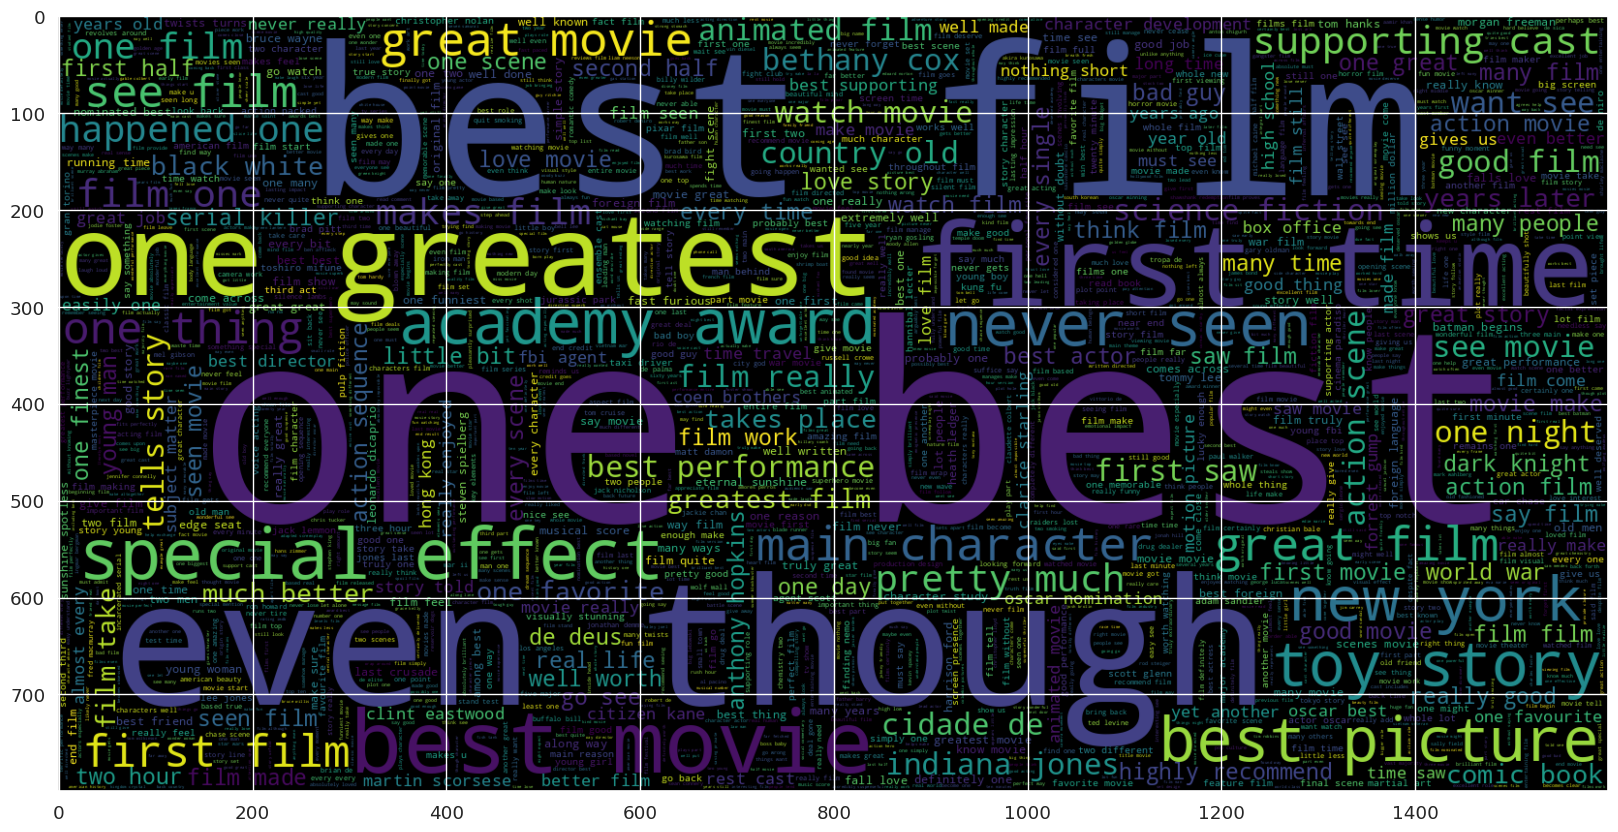

In [ ]:
#Generates a word cloud visualization for the positive IMDb review
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))  # Positive imdb Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_imdb == 1]['User Reviews']))
plt.imshow(wc, interpolation='bilinear')

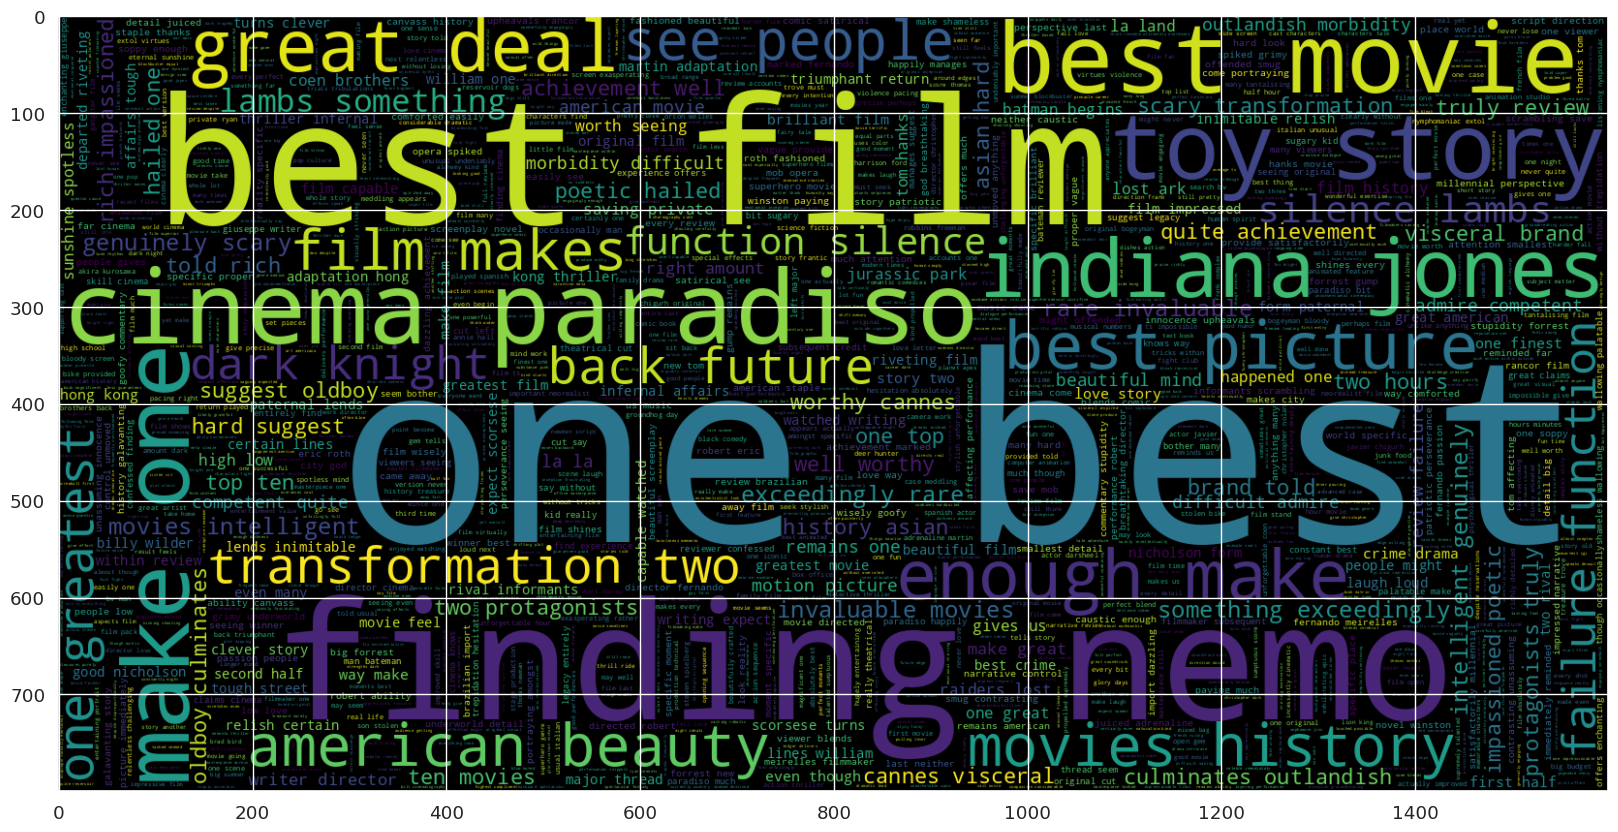

In [ ]:
#Generates a word cloud visualization for the positive RT review
plt.figure(figsize=(20, 20))  # Positive rt Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_rt == 1]['RT_review']))
plt.imshow(wc, interpolation='bilinear')

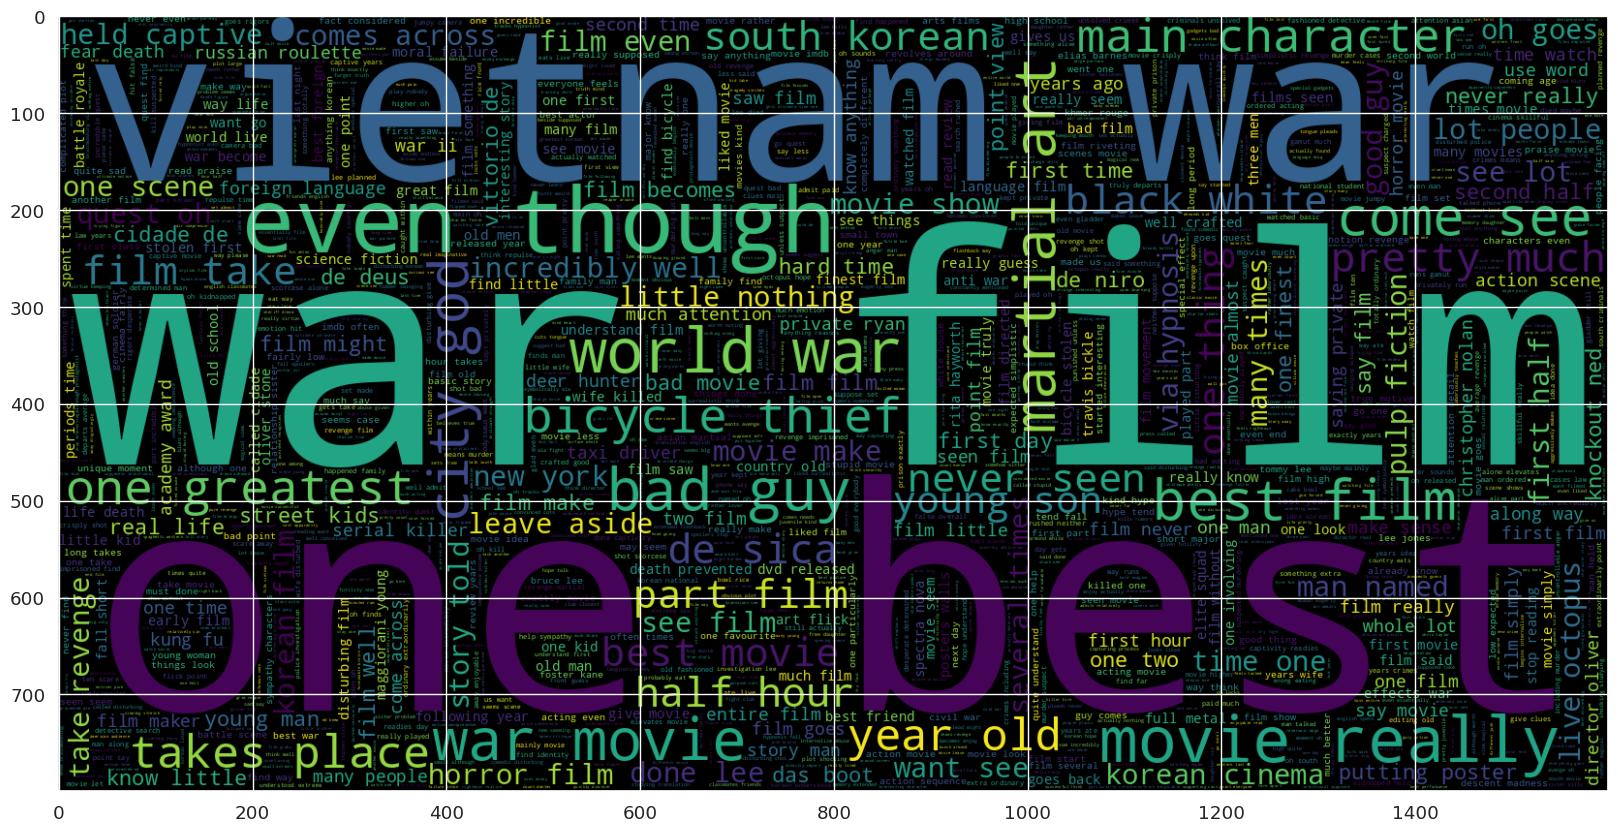

In [ ]:
#Generates a word cloud visualization for the negative IMDb review
plt.figure(figsize=(20, 20))  # Negative imdb Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_imdb == 0]['User Reviews']))
plt.imshow(wc, interpolation='bilinear')

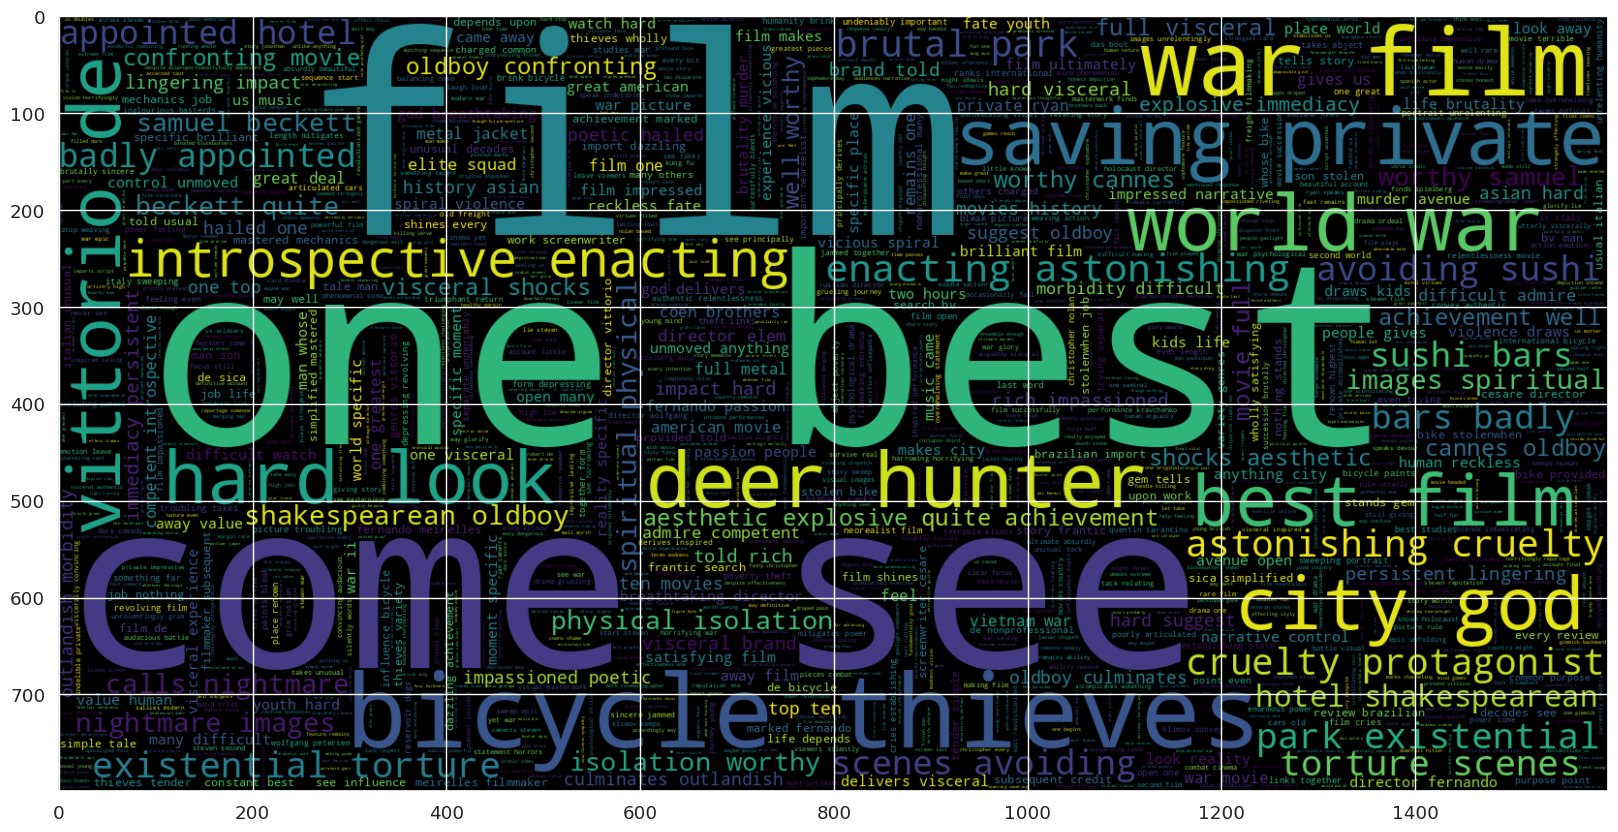

In [ ]:
#Generates a word cloud visualization for the negative RT review
plt.figure(figsize=(20, 20))  # Negative rt Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_imdb == 0]['RT_review']))
plt.imshow(wc, interpolation='bilinear')

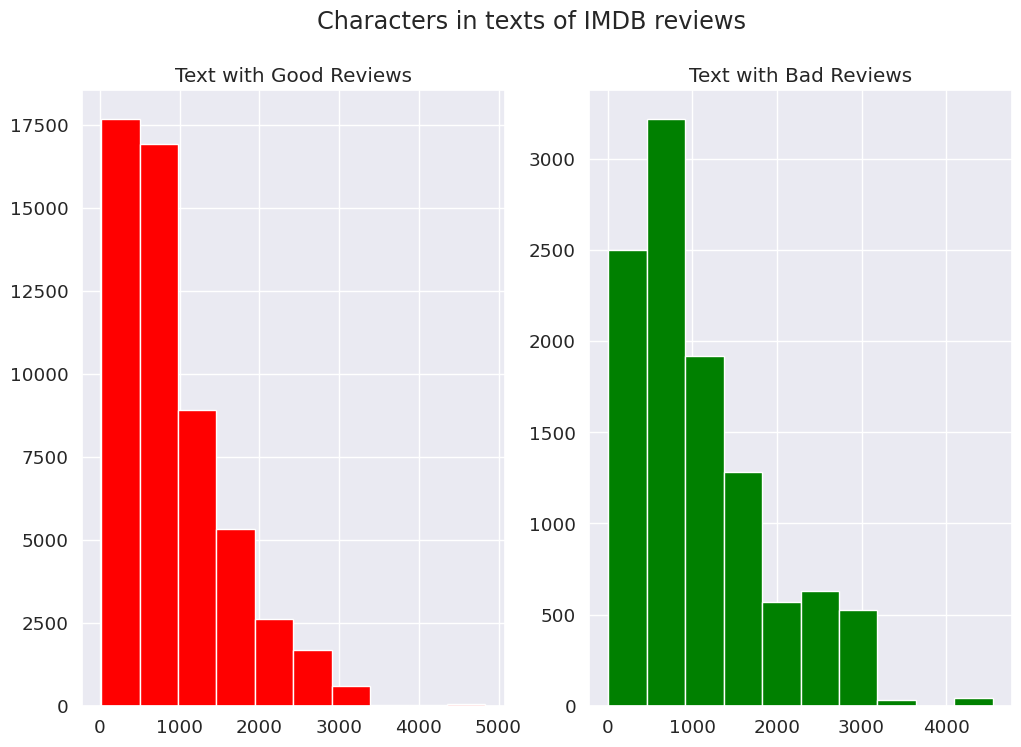

In [ ]:
import matplotlib.pyplot as plt
#Number of characters in texts of IMDB reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data_cleaned[data_cleaned['sentiment_imdb']==1]['User Reviews'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=data_cleaned[data_cleaned['sentiment_imdb']==0]['User Reviews'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts of IMDB reviews')
plt.show()

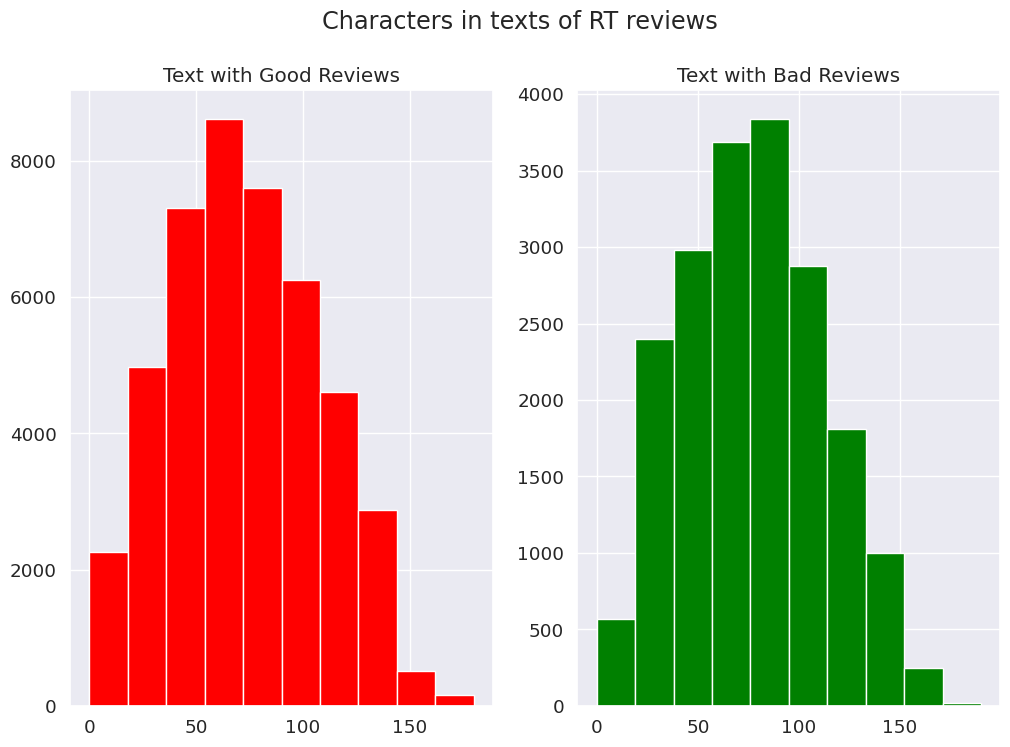

In [66]:
import matplotlib.pyplot as plt
#Number of characters in texts of RT reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data_cleaned[data_cleaned['sentiment_rt']==1]['RT_review'].str.len()

ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=data_cleaned[data_cleaned['sentiment_rt']==0]['RT_review'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts of RT reviews')
plt.show()

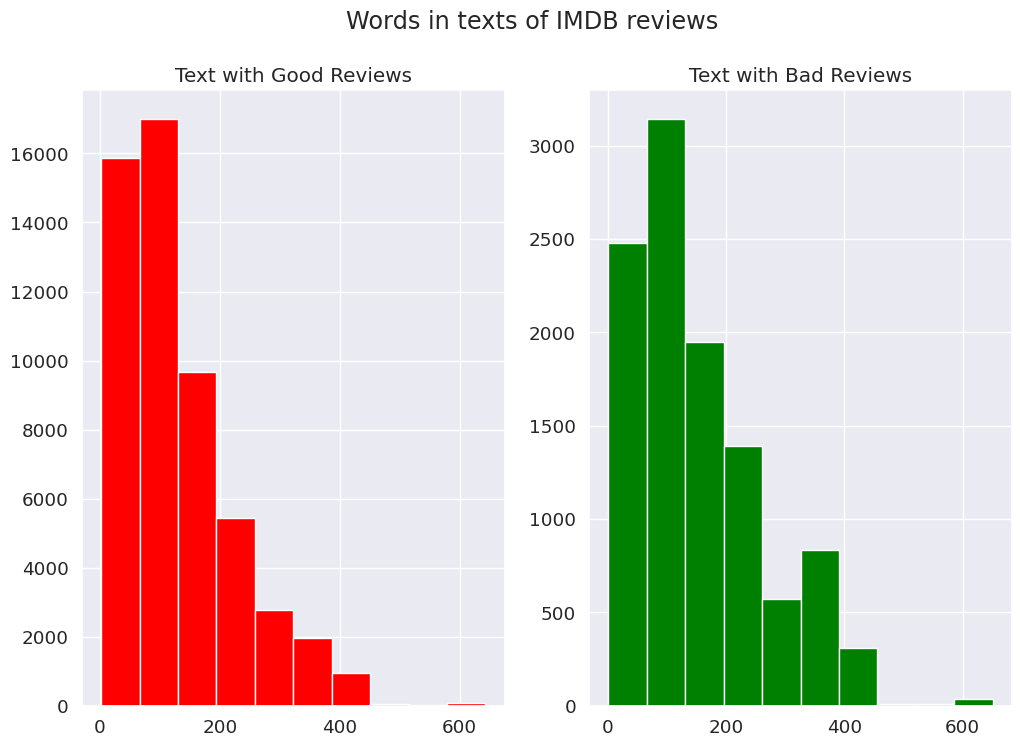

In [67]:
#Words in texts of IMDB reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data_cleaned[data_cleaned['sentiment_imdb']==1]['User Reviews'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=data_cleaned[data_cleaned['sentiment_imdb']==0]['User Reviews'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts of IMDB reviews')
plt.show()

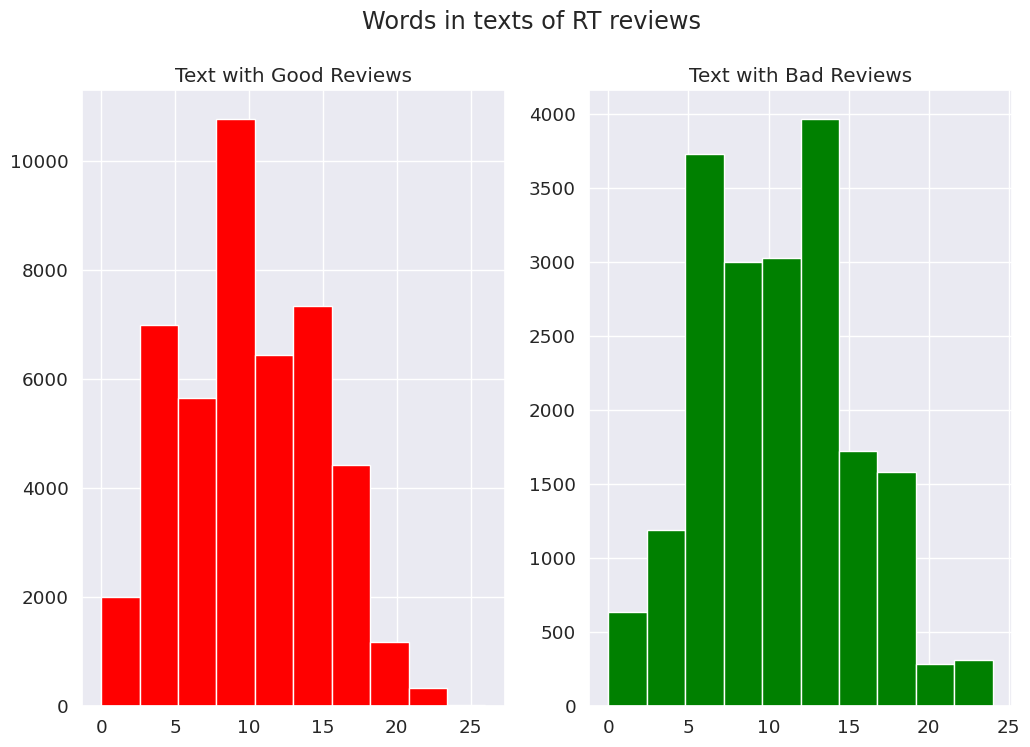

In [32]:
#Words in texts of RT reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data_cleaned[data_cleaned['sentiment_rt']==1]['RT_review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=data_cleaned[data_cleaned['sentiment_rt']==0]['RT_review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts of RT reviews')
plt.show()

<ipython-input-33-5362f55dff11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-33-5362f55dff11>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Average word length in each text of IMDB reviews')

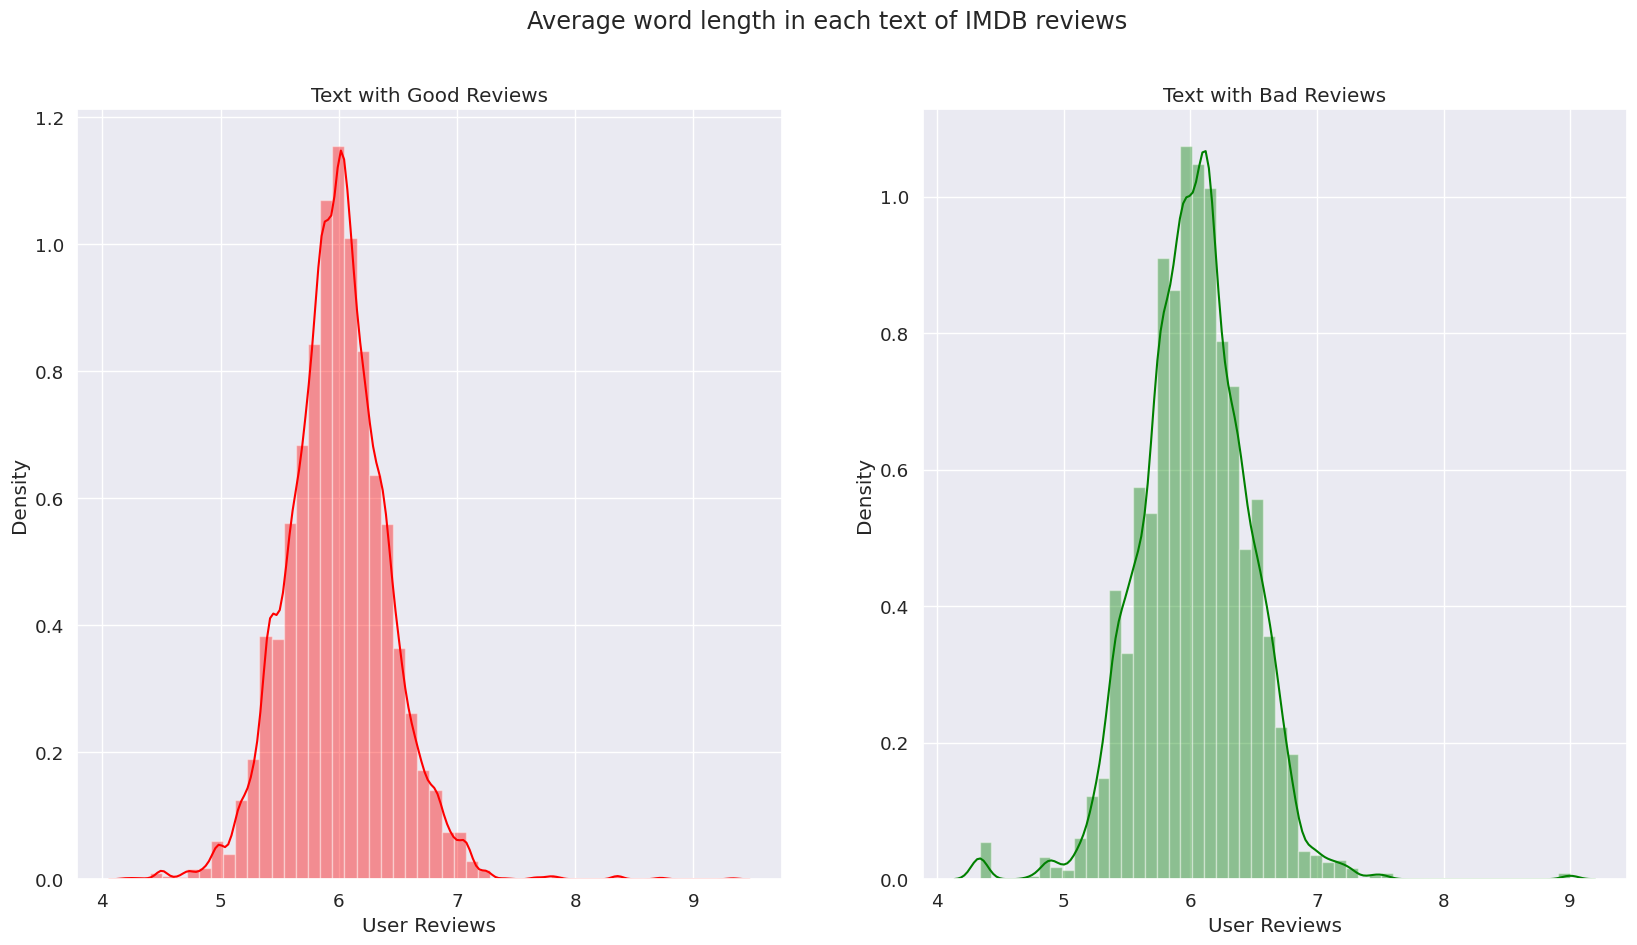

In [33]:
#Average word length in each text of IMDB reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data_cleaned[data_cleaned['sentiment_imdb']==1]['User Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=data_cleaned[data_cleaned['sentiment_imdb']==0]['User Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text of IMDB reviews')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-34-d358041c67fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-

Text(0.5, 0.98, 'Average word length in each text of RT reviews')

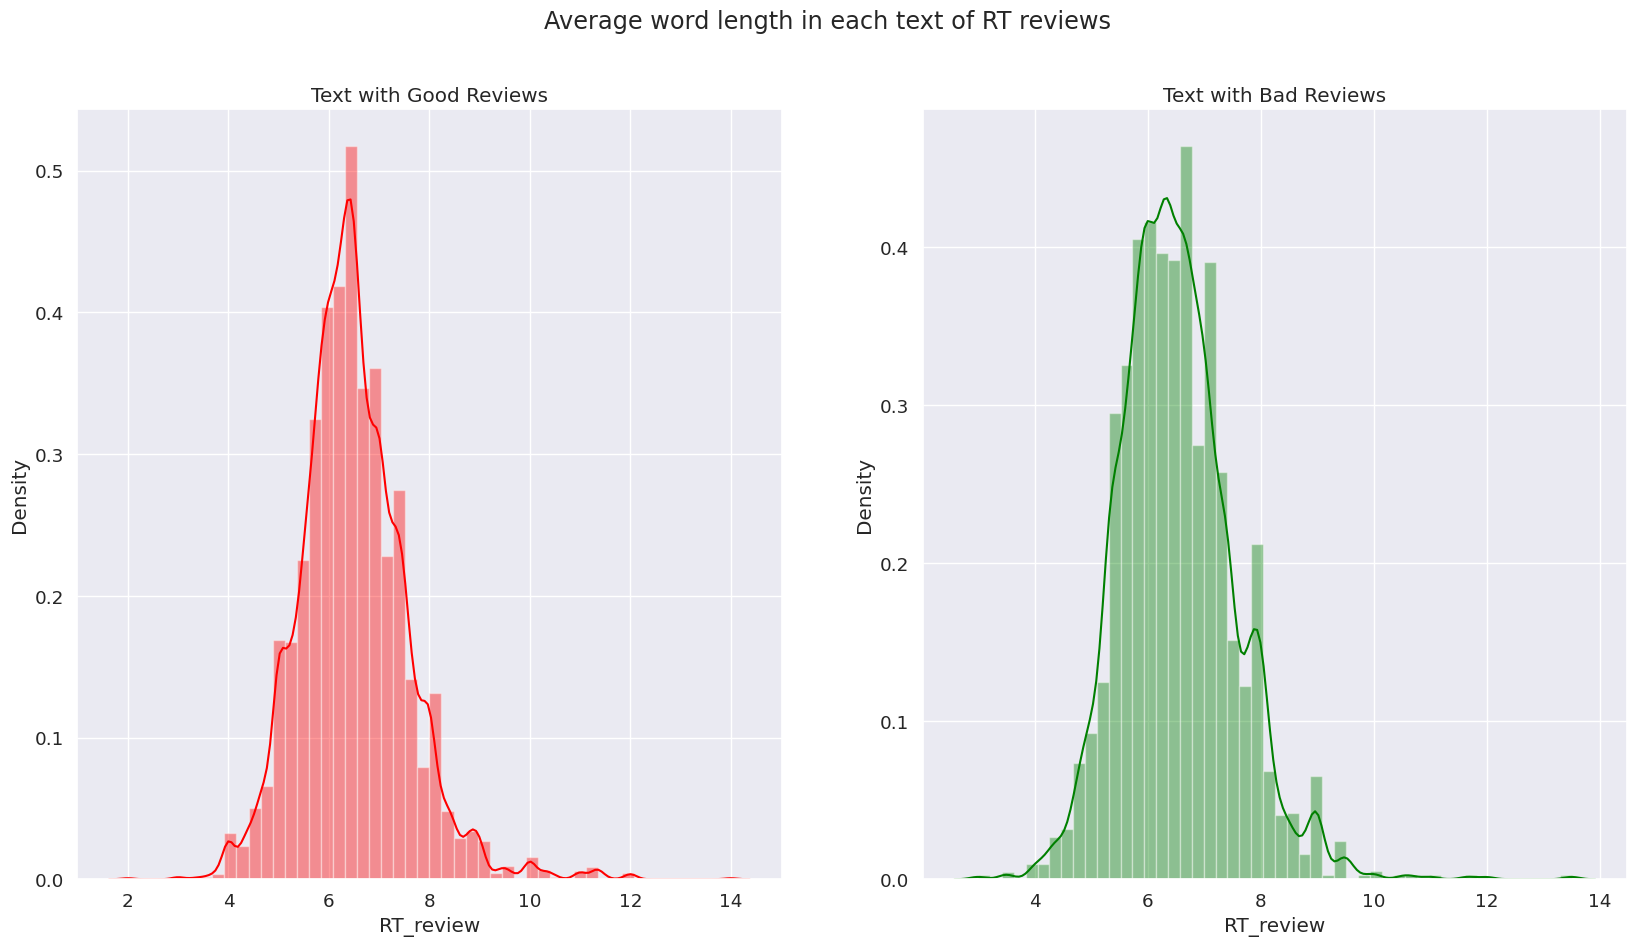

In [34]:
#Average word length in each text of RT reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data_cleaned[data_cleaned['sentiment_rt']==1]['RT_review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=data_cleaned[data_cleaned['sentiment_rt']==0]['RT_review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text of RT reviews')

In [35]:
#extract individual words from the 'User Reviews' column
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus_imdb = get_corpus(data_cleaned['User Reviews'])
corpus_imdb[:5]

['departed', 'finally', 'gained', 'martin', 'scorsese']

In [36]:
#extract individual words from the 'RT_review' column
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus_rt = get_corpus(data_cleaned['RT_review'])
corpus_rt[:5]

['martin', 'adaptation', 'hong', 'kong', 'thriller']

In [37]:
#count the occurrences of each word in the corpus_imdb
from collections import Counter
counter = Counter(corpus_imdb)
most_common = counter.most_common(10)
most_common_imdb = dict(most_common)
most_common_imdb

{'film': 138110,
 'one': 97662,
 'movie': 85702,
 'like': 58867,
 'story': 46605,
 'even': 39957,
 'also': 37896,
 'best': 37212,
 'see': 36937,
 'really': 36166}

In [38]:
#count the occurrences of each word in the corpus_rt
from collections import Counter
counter = Counter(corpus_rt)
most_common = counter.most_common(10)
most_common_rt = dict(most_common)
most_common_rt

{'film': 10699,
 'one': 7952,
 'movie': 5230,
 'like': 4149,
 'best': 3237,
 'story': 2806,
 'great': 2635,
 'even': 2546,
 'much': 2108,
 'good': 2099}

In [39]:
#returns the n most frequent n-grams (sequences of g consecutive words) found in the corpus along with their respective frequencies.
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
#Unigram Analysis ON imdb REVIEWS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
most_common_uni = get_top_text_ngrams(data_cleaned['User Reviews'],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text of IMDB reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [41]:
#Unigram Analysis ON RT REVIEWS
from sklearn.feature_extraction.text import CountVectorizer
most_common_uni = get_top_text_ngrams(data_cleaned['RT_review'],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text of RT reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [42]:
#Bigram Analysis on Imdb Reviews
most_common_bi = get_top_text_ngrams(data_cleaned['User Reviews'],20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text of IMDB reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [43]:
#Bigram Analysis on RT Reviews
most_common_bi = get_top_text_ngrams(data_cleaned['RT_review'],20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text of RT reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [68]:
#Trigram Analysis on Imdb Reviews
most_common_tri = get_top_text_ngrams(data_cleaned['User Reviews'],20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text of IMDB reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [69]:
#Trigram Analysis on RT Reviews
most_common_tri = get_top_text_ngrams(data_cleaned['RT_review'],20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text of RT reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split

train, test= train_test_split(data_cleaned, test_size=0.2, random_state=42)
Xtrain, ytrain = train['RT_review'], train['sentiment_rt']
Xtest, ytest = test['RT_review'], test['sentiment_rt']
#splitting the train set into train and validation on RT data
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,
                                             test_size=0.2,random_state=10)

In [71]:
pip install tokenizers


In [73]:
pip install transformers


In [74]:
import transformers
from tokenizers import BertWordPieceTokenizer
#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [76]:
pip install keras


In [77]:
from keras.preprocessing.text import Tokenizer

In [78]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  10212


In [79]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(Xtrain)
seq_test =  tokenizer.texts_to_sequences(Xtest)

In [80]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 26


In [81]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 19


In [82]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 96.25 % of data


In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a tokenizer and fit on the training data
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)

# Convert text data to sequences of integers
Xtrain_enc = tokenizer.texts_to_sequences(Xtrain)
Xval_enc = tokenizer.texts_to_sequences(Xval)

# Pad the sequences to the desired length using pad_sequences from Keras
input_ids_train = pad_sequences(Xtrain_enc, maxlen=max_seq_len, padding='post', truncating='post')
input_ids_val = pad_sequences(Xval_enc, maxlen=max_seq_len, padding='post', truncating='post')


import numpy as np
ytrain = np.array(ytrain)
yval = np.array(yval)


In [84]:
!pip install transformers

In [85]:
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a new tokenizer using the Hugging Face BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode the text data using the tokenizer
Xtrain_enc = tokenizer(Xtrain.tolist(), add_special_tokens=True, padding='max_length', max_length=max_seq_len, truncation=True, return_tensors='np')
Xval_enc = tokenizer(Xval.tolist(), add_special_tokens=True, padding='max_length', max_length=max_seq_len, truncation=True, return_tensors='np')
Xtest_enc = tokenizer(Xtest.tolist(),add_special_tokens=True, padding='max_length', max_length=max_seq_len, truncation=True, return_tensors='np')
# Get the input_ids and attention_mask from the encoded outputs
input_ids_train = Xtrain_enc['input_ids']
attention_mask_train = Xtrain_enc['attention_mask']

input_ids_val = Xval_enc['input_ids']
attention_mask_val = Xval_enc['attention_mask']

input_ids_val = Xtest_enc['input_ids']
attention_mask_val = Xtest_enc['attention_mask']

import numpy as np
ytrain = np.array(ytrain)
yval = np.array(yval)


In [86]:
import tensorflow as tf

# Preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(Xtrain_enc), ytrain))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(Xval_enc), yval))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(Xtest_enc), ytest))


In [87]:
#function for bert_model which builds and trains a BERT-based model for binary classification using TensorFlow/Keras.
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])

    return r,model,n_epochs

In [88]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [89]:
#Importing Libraries
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [90]:
epochs = 2  # You can set this to a lower value, like 1 or 2
max_len = max_seq_len

# Call the bert_model function with the reduced number of epochs
r, model, n_epochs = bert_model(train_dataset, val_dataset, transformer, max_len, epochs)


----Building the model----
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 19)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 19)]         0           []                               
                                                                                                  
 tf_distil_bert_model_1 (TFDist  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 ilBertModel)                   ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 19, 768),                                                    
                                 hidden_states=None              

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning:

Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.



1292/1292 [==============================] - 6583s 5s/step - loss: 0.6312 - accuracy: 0.6957 - val_loss: 0.6198 - val_accuracy: 0.6995
Epoch 2/2
1292/1292 [==============================] - 1496s 1s/step - loss: 0.6154 - accuracy: 0.6981
Train score: [0.6154244542121887, 0.6981437802314758]
323/323 [==============================] - 374s 1s/step - loss: 0.6140 - accuracy: 0.6995
Validation score: [0.6140124797821045, 0.6995450854301453]


In [91]:
#Evaluate Model Performance on Test set
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

404/404 [==============================] - 466s 1s/step - loss: 0.6114 - accuracy: 0.7021
{'loss': 0.6114280223846436, 'accuracy': 0.702106237411499}


404/404 [==============================] - 555s 1s/step


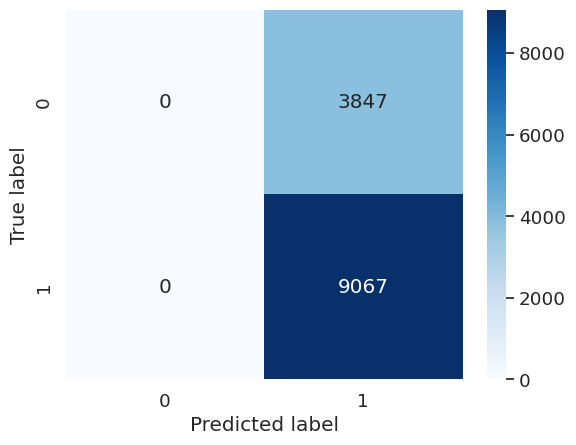

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(32))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()